# Feature Engineering

In this notebook we shall modify the data in order to make it suitable for the Algorithms.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('CVD_cleaned.csv')
data_not_balanced = data.copy()
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [3]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [4]:
data['Heart_Disease'].value_counts()

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64

As we can see the dataset is highly imbalanced. We need to balance the dataset by bringing the yes and no counts to the same level.

In [5]:
indices_of_no = list(data[data['Heart_Disease'] == 'No'].index)
len(indices_of_no)

283883

In [6]:
samples_to_remove = random.sample(indices_of_no,258883)

In [7]:
data_balanced = data.copy()

We have generated 258883 random indices, we will remove the rows with these indices for which the Heart_Disease value is 'no'.

In [8]:
# data_balanced = data_balanced.drop(samples_to_remove,axis=0)
# data_balanced

Now we have around 50000 overall data points to build our model. Our data now has half yes and half no points in 'Heart_Disease'
column.

In [9]:
# data_balanced = data_balanced.reset_index(drop=True)

We will now look at the numerical columns in order to check if the distribution has changed.

In [10]:
def UVA_numeric(data, var_group):
 
    size = len(var_group)
    plt.figure(figsize = (7*size,5*size), dpi = 100)
    p=0
    if size == 4:
        p=1
    else:
        p=2
    #looping for each variable
    for j,i in enumerate(var_group):
    
        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

        #Plotting the variable with every information
        plt.subplot(2,2,j+1)
        sns.kdeplot(x=data[i], fill=True)
        sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
        sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
        sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
        sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                       round(kurt,2),
                                                                                                       round(skew,2),
                                                                                                       (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                       round(mean,2),
                                                                                                       round(median,2)))

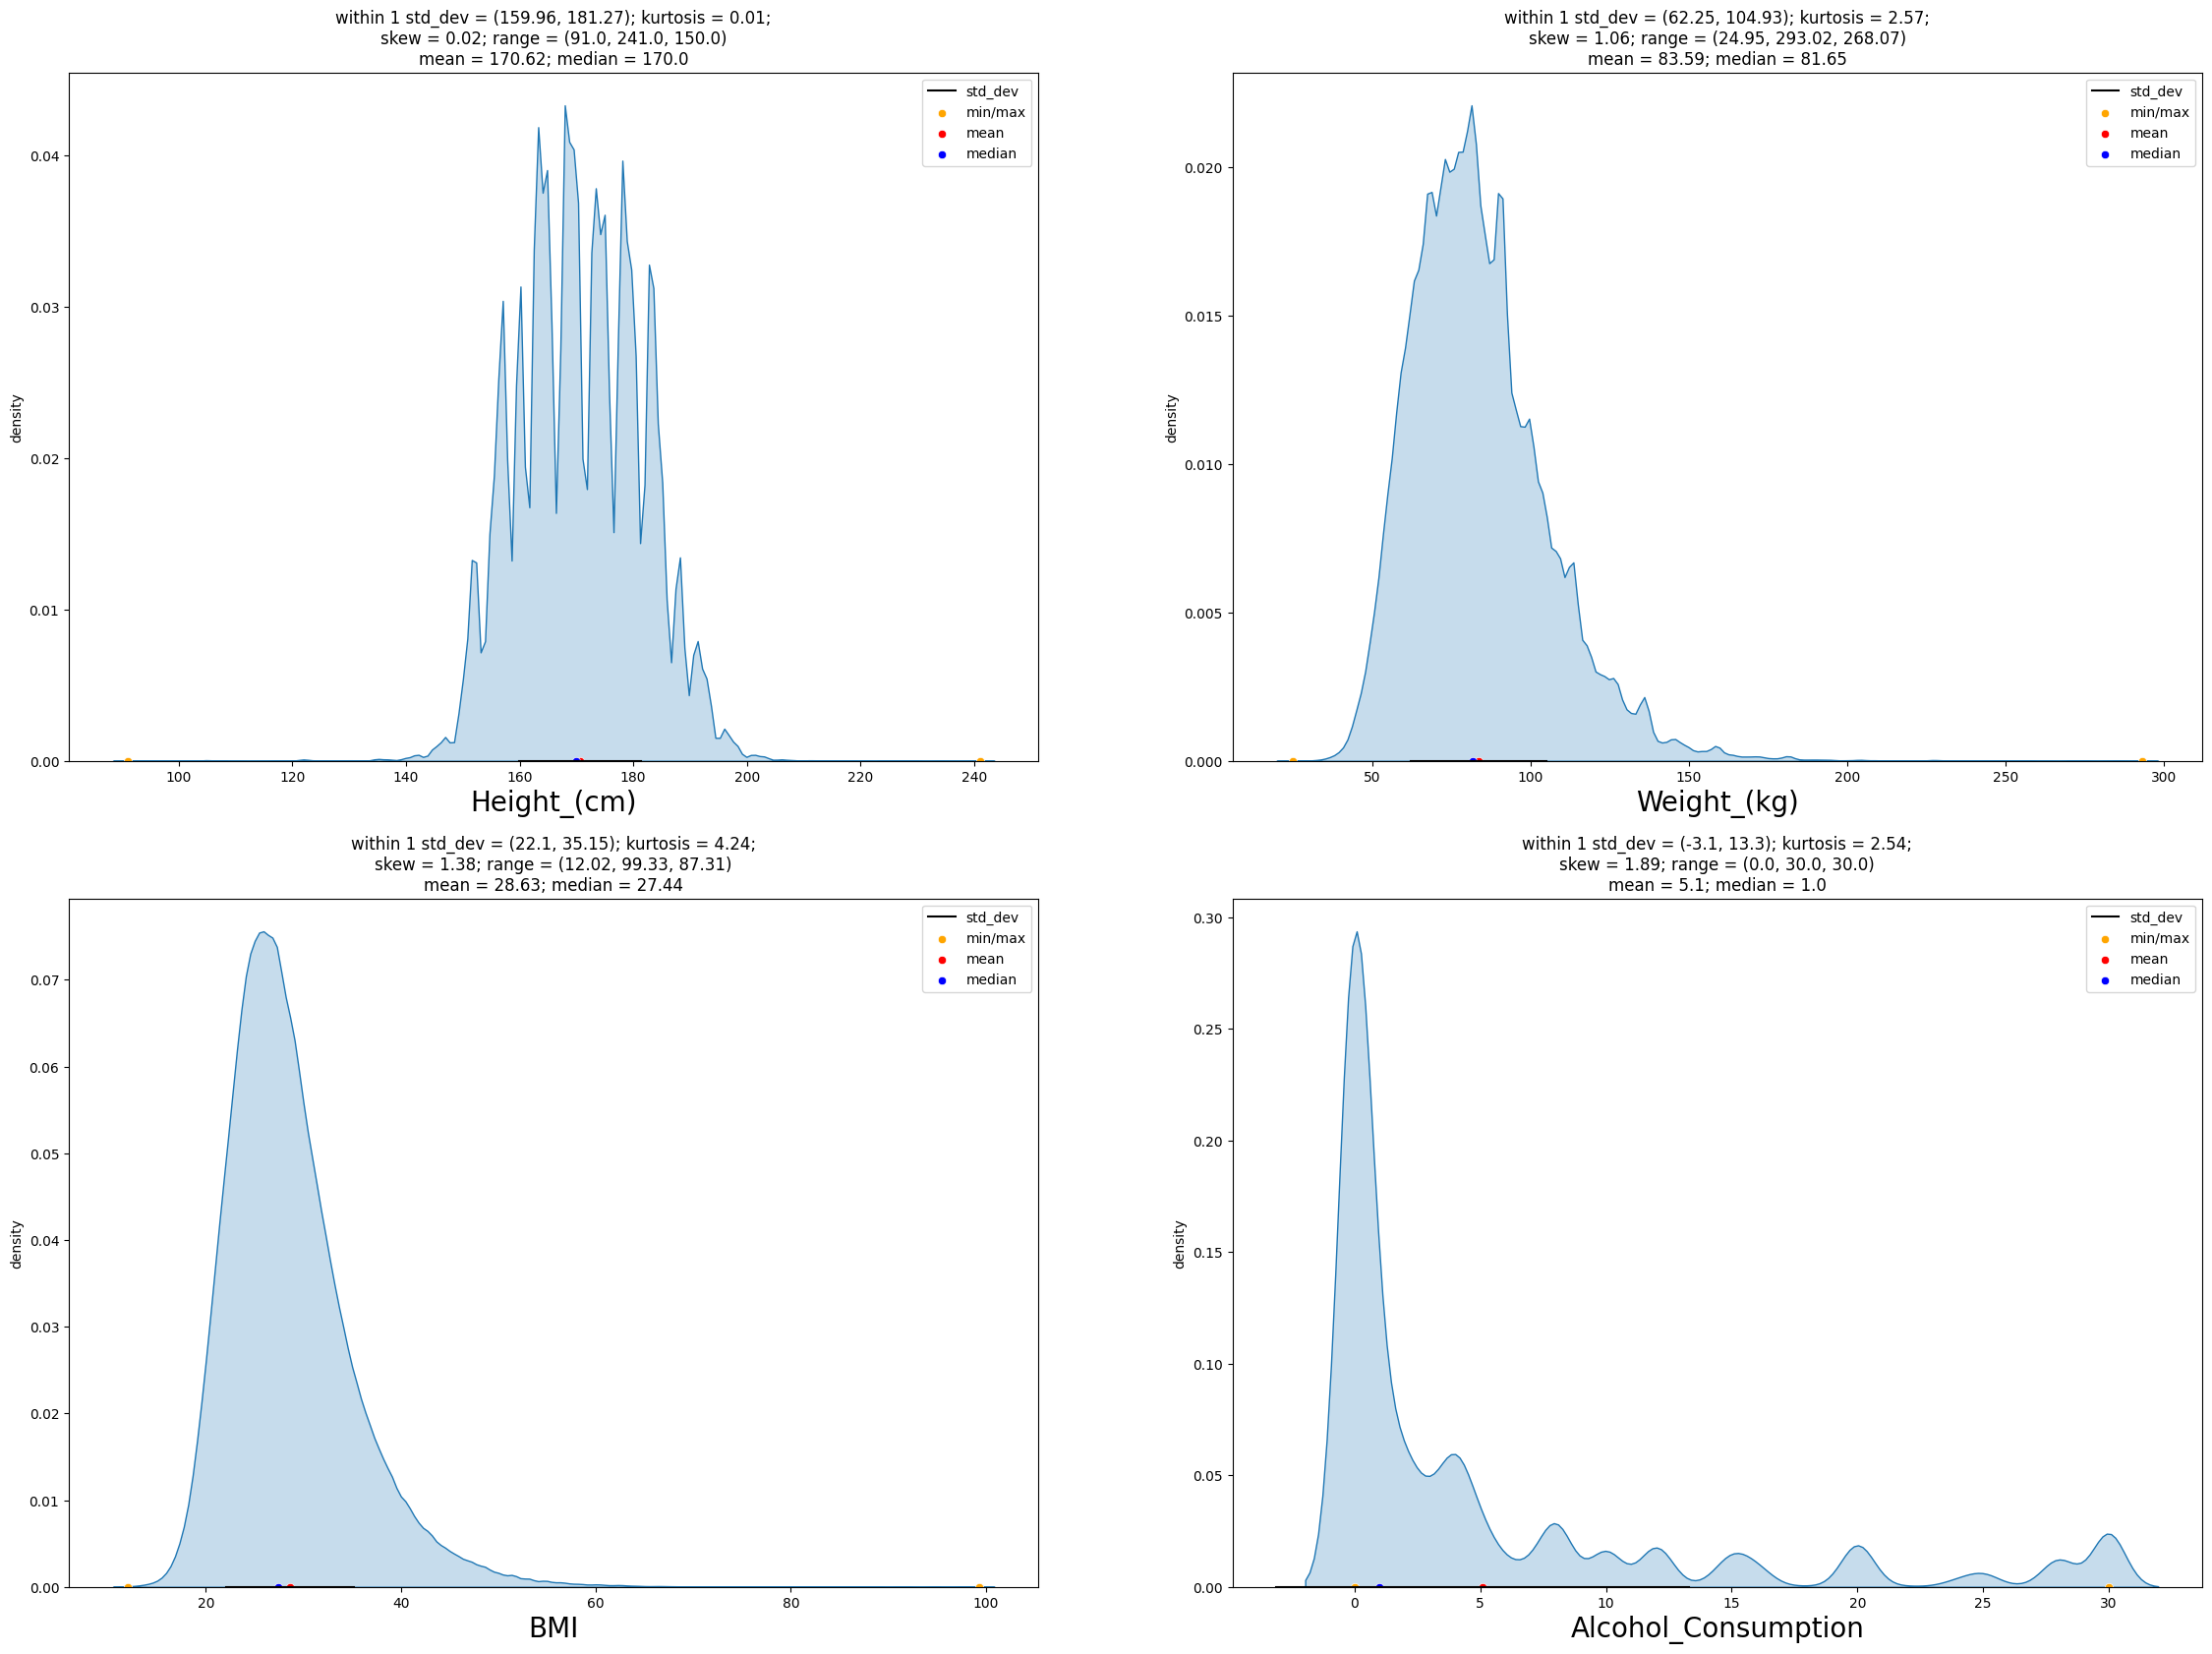

In [11]:
UVA_numeric(data_balanced,['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption'])

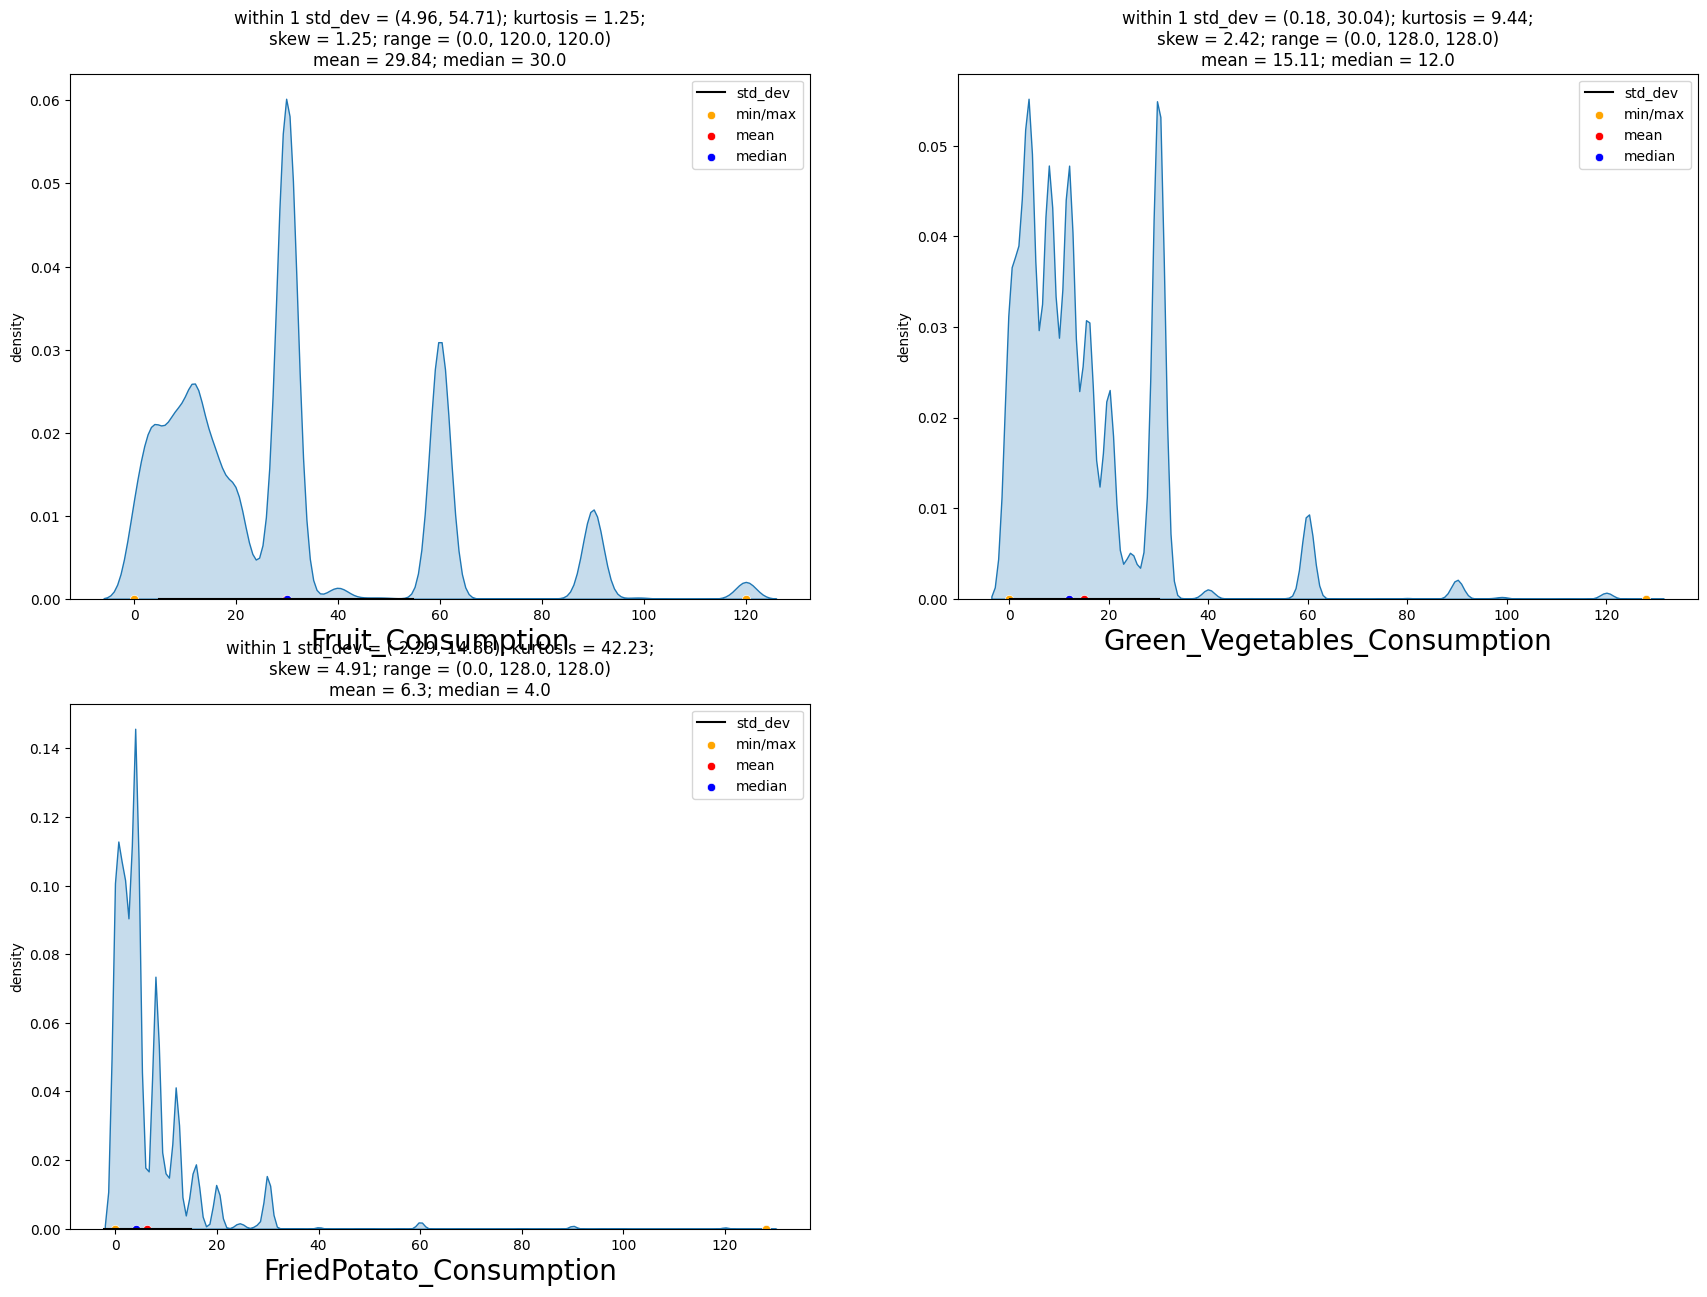

In [12]:
UVA_numeric(data_balanced,['Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption'])

Distribution of all numerical variables is almost the same.

In [13]:
def Bivariate_cont_cat(data,numerical_cols,required):
    j=1
    for i,col in enumerate(numerical_cols):
        if i not in required:
            continue
        size = len(numerical_cols)
        plt.figure(figsize = (10,7), dpi = 100)
        ptable = pd.pivot_table(data=data, values=col, columns='Heart_Disease', aggfunc ='mean')

        plt.subplot(len(required),2,j)
        sns.barplot(ptable)
        plt.ylabel(col)
        plt.xlabel('Heart_disease Yes or No')
        plt.title('Plot of {} vs Heart Disease'.format(col))

        # boxplot
        plt.subplot(len(required),2,j+1)
        sns.boxplot(x='Heart_Disease', y=col, data=data)
        plt.title('Box plot of {}'.format(col))
        j+=2

In [14]:
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

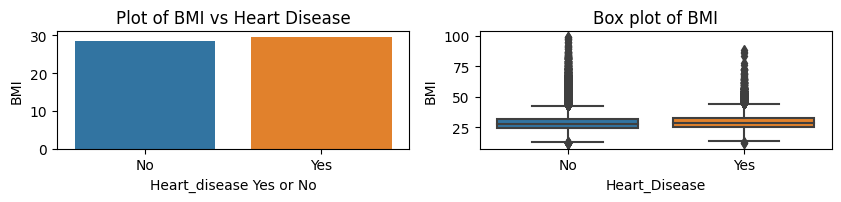

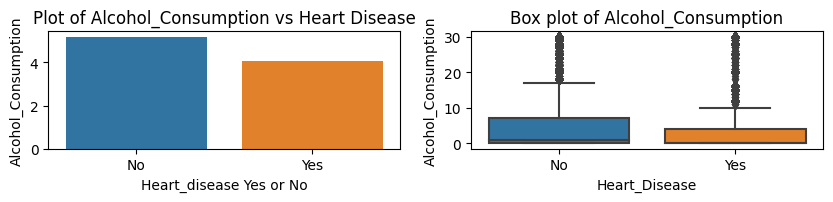

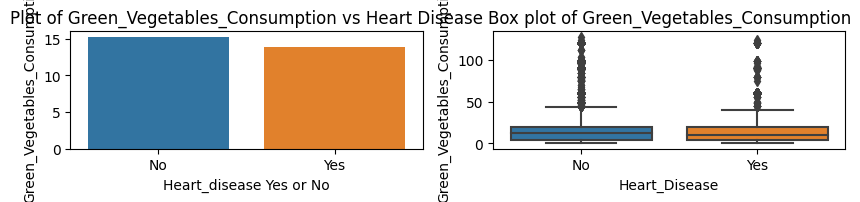

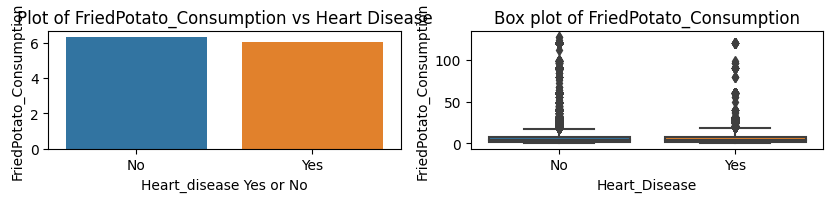

In [15]:
Bivariate_cont_cat(data_balanced,numerical_cols,[2,3,5,6])

Plots are similar for the numerical variables vs heart disease.

## Let's start the feature engineering.

Now we can do label encoding for the columns general health and age group and implement binning for the height column.

In [16]:
print(data_balanced['General_Health'].unique())
print(data_balanced['Age_Category'].unique())

['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']


In [17]:
data_balanced['General_Health'] = data_balanced['General_Health'].map({'Very Good':2, 'Poor':5, 'Fair':4, 'Good':3, 'Excellent':1})
data_not_balanced['General_Health'] = data_not_balanced['General_Health'].map({'Very Good':2, 'Poor':5, 'Fair':4, 'Good':3, 'Excellent':1})

In [18]:
data_balanced['Age_Category'] = data_balanced['Age_Category'].map({'18-24':1, '25-29':1, '70-74':5, '75-79':5,'60-64':4, 
                                                                   '65-69':4, '45-49':3, '80+':6 ,'30-34':2, '55-59':4, 
                                                                   '35-39':2, '50-54':3, '40-44':3})
data_not_balanced['Age_Category'] = data_not_balanced['Age_Category'].map({'18-24':1, '25-29':1, '70-74':5, '75-79':5,'60-64':4, 
                                                                   '65-69':4, '45-49':3, '80+':6 ,'30-34':2, '55-59':4, 
                                                                   '35-39':2, '50-54':3, '40-44':3})
# 1 and 2 are sparse categories, hence we are grouping them.
data_balanced['Age_Category'] = data_balanced['Age_Category'].map({1:1, 2:1, 3:3, 4:4, 5:5, 6:6})

Now we will apply binning to the Height column.

In [19]:
data_balanced['Height_(cm)'].describe()

count    308854.000000
mean        170.615249
std          10.658026
min          91.000000
25%         163.000000
50%         170.000000
75%         178.000000
max         241.000000
Name: Height_(cm), dtype: float64

In [20]:
def height_map(x):
    if x in range(91,164):
        return'short'
    elif x in range(164,180):
        return 'average'
    elif x in range(180,189):
        return 'tall'
    else:
        return 'very_tall'

In [21]:
data_balanced['Height_(cm)'] = data_balanced['Height_(cm)'].apply(height_map)

Since the weight column is highly correlated to BMI, it can be dropped.
(Dimensionality reduction)

## Now let's create two separate processed datasets:

1. One dataset with label encoding, application of log to numerical columns and the weight column removed.

2. One dataset without label encoding, no application of log to the numerical columns and with the weight column retained.

In [22]:
data_balanced_2 = data_not_balanced.copy()

In [23]:
#data_balanced.drop('Weight_(kg)',axis=1,inplace=True)

In [24]:
data_balanced.columns.values

array(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease',
       'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes',
       'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)',
       'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'], dtype=object)

In [25]:
input_cols_1 = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression',
              'Diabetes','Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
              'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
input_cols_2 = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression',
              'Diabetes','Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
              'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

In [26]:
# People with BMI grater than 25 will have a higher risk of heart disease. Hence we can create a new feature.

In [27]:
def BMI_range(x):
    if x>25:
        return 'Yes'
    else:
        return 'No'

In [28]:
data_balanced['BMI_25+'] = data_balanced['BMI'].apply(BMI_range)

In [29]:
input_cols_1 = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression',
              'Diabetes','Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'BMI_25+', 'Smoking_History', 'Alcohol_Consumption',
              'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

In [30]:
inputs_1 = data_balanced[input_cols_1]

In [31]:
data_balanced_2['General_Health'] = data_balanced_2['General_Health'].astype('float64')
data_balanced_2['Age_Category'] = data_balanced_2['Age_Category'].astype('float64')

In [32]:
# We are creating categories out of the two columns, this will make the algorithm treat all categories as the same when we
# do one hot encoding.
data_balanced_2['General_Health'] = data_balanced_2['General_Health'].map({1:'A',2:'B',3:'C',4:'D',5:'E'})
data_balanced_2['Age_Category'] = data_balanced_2['Age_Category'].map({1:'A',2:'B',3:'C',4:'D',5:'E',6:'F'})
data_balanced_2
inputs_2 = data_balanced_2[input_cols_2]
inputs_2

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,E,Within the past 2 years,No,No,No,No,No,Yes,Female,E,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,B,Within the past year,No,No,No,No,Yes,No,Female,E,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,B,Within the past year,Yes,No,No,No,Yes,No,Female,D,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,E,Within the past year,Yes,No,No,No,Yes,No,Male,E,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,C,Within the past year,No,No,No,No,No,No,Male,F,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,B,Within the past year,Yes,No,No,No,No,No,Male,A,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,D,Within the past 5 years,Yes,No,No,No,Yes,No,Male,D,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,B,5 or more years ago,Yes,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,B,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,B,Within the past year,Yes,No,No,No,No,No,Male,D,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [33]:
inputs_onehot_1 = pd.get_dummies(inputs_1,drop_first=True)
inputs_onehot_1

,General_Health,Age_Category,Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Checkup_Never,Checkup_Within the past 2 years,...,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Height_(cm)_short,Height_(cm)_tall,Height_(cm)_very_tall,BMI_25+_Yes,Smoking_History_Yes
0,5,5,32.66,14.54,0.0,30.0,16.0,12.0,False,True,...,False,False,False,True,False,True,False,False,False,True
1,2,5,77.11,28.29,0.0,30.0,0.0,4.0,False,False,...,False,True,False,False,False,False,False,False,True,False
2,2,4,88.45,33.47,4.0,12.0,3.0,16.0,False,False,...,False,True,False,False,False,True,False,False,True,False
3,5,5,93.44,28.73,0.0,30.0,30.0,8.0,False,False,...,False,True,False,False,True,False,True,False,True,False
4,3,6,88.45,24.37,0.0,8.0,4.0,0.0,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,2,1,81.65,29.05,4.0,30.0,8.0,0.0,False,False,...,False,False,False,False,True,False,False,False,True,False
308850,4,4,69.85,21.48,8.0,15.0,60.0,4.0,False,False,...,False,True,False,False,True,False,True,False,False,False
308851,2,1,61.23,24.69,4.0,40.0,8.0,4.0,False,False,...,False,False,True,False,False,True,False,False,False,True
308852,2,4,79.38,23.73,3.0,30.0,12.0,0.0,False,False,...,False,False,False,False,True,False,True,False,False,False


In [34]:
inputs_onehot_2 = pd.get_dummies(inputs_2,drop_first=True)
inputs_onehot_2

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_B,General_Health_C,General_Health_D,...,Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_B,Age_Category_C,Age_Category_D,Age_Category_E,Age_Category_F,Smoking_History_Yes
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,False,False,False,...,True,False,False,True,False,False,False,True,False,False
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,False,True,False,...,False,False,False,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,168.0,81.65,29.05,4.0,30.0,8.0,0.0,True,False,False,...,False,False,False,True,False,False,False,False,False,False
308850,180.0,69.85,21.48,8.0,15.0,60.0,4.0,False,False,True,...,True,False,False,True,False,False,True,False,False,False
308851,157.0,61.23,24.69,4.0,40.0,8.0,4.0,True,False,False,...,False,True,False,False,True,False,False,False,False,True
308852,183.0,79.38,23.73,3.0,30.0,12.0,0.0,True,False,False,...,False,False,False,True,False,False,True,False,False,False


Convert True and False values to 1s and os.

In [35]:
def onehot(x):
    if x == True:
        return 1
    elif x == False:
        return 0
    else:
        return x

In [36]:
for col in inputs_onehot_1.columns.values:
    inputs_onehot_1[col] = inputs_onehot_1[col].apply(onehot)
for col in inputs_onehot_2.columns.values:
    inputs_onehot_2[col] = inputs_onehot_2[col].apply(onehot) 

In [37]:
inputs_onehot_1

,General_Health,Age_Category,Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Checkup_Never,Checkup_Within the past 2 years,...,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Height_(cm)_short,Height_(cm)_tall,Height_(cm)_very_tall,BMI_25+_Yes,Smoking_History_Yes
0,5,5,32.66,14.54,0.0,30.0,16.0,12.0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,2,5,77.11,28.29,0.0,30.0,0.0,4.0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,2,4,88.45,33.47,4.0,12.0,3.0,16.0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,5,5,93.44,28.73,0.0,30.0,30.0,8.0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,3,6,88.45,24.37,0.0,8.0,4.0,0.0,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,2,1,81.65,29.05,4.0,30.0,8.0,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
308850,4,4,69.85,21.48,8.0,15.0,60.0,4.0,0,0,...,0,1,0,0,1,0,1,0,0,0
308851,2,1,61.23,24.69,4.0,40.0,8.0,4.0,0,0,...,0,0,1,0,0,1,0,0,0,1
308852,2,4,79.38,23.73,3.0,30.0,12.0,0.0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [38]:
inputs_onehot_2

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_B,General_Health_C,General_Health_D,...,Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_B,Age_Category_C,Age_Category_D,Age_Category_E,Age_Category_F,Smoking_History_Yes
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,168.0,81.65,29.05,4.0,30.0,8.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
308850,180.0,69.85,21.48,8.0,15.0,60.0,4.0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
308851,157.0,61.23,24.69,4.0,40.0,8.0,4.0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
308852,183.0,79.38,23.73,3.0,30.0,12.0,0.0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


Now let's apply log to the numerical columns in the first dataset since there is a positive skew in all of them.

In [39]:
numerical_cols_1 = ['General_Health', 'Age_Category','Weight_(kg)', 'BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']
numerical_cols_2 = ['General_Health','Age_Category','BMI', 'Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']

In [40]:
for col in numerical_cols_1:
    inputs_onehot_1[col] = np.sqrt(inputs_onehot_1[col])

In [41]:
inputs_onehot_1

,General_Health,Age_Category,Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Checkup_Never,Checkup_Within the past 2 years,...,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Height_(cm)_short,Height_(cm)_tall,Height_(cm)_very_tall,BMI_25+_Yes,Smoking_History_Yes
0,2.236068,2.236068,5.714893,3.813135,0.000000,5.477226,4.000000,3.464102,0,1,...,0,0,0,1,0,1,0,0,0,1
1,1.414214,2.236068,8.781230,5.318834,0.000000,5.477226,0.000000,2.000000,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1.414214,2.000000,9.404786,5.785326,2.000000,3.464102,1.732051,4.000000,0,0,...,0,1,0,0,0,1,0,0,1,0
3,2.236068,2.236068,9.666437,5.360037,0.000000,5.477226,5.477226,2.828427,0,0,...,0,1,0,0,1,0,1,0,1,0
4,1.732051,2.449490,9.404786,4.936598,0.000000,2.828427,2.000000,0.000000,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1.414214,1.000000,9.036039,5.389805,2.000000,5.477226,2.828427,0.000000,0,0,...,0,0,0,0,1,0,0,0,1,0
308850,2.000000,2.000000,8.357631,4.634652,2.828427,3.872983,7.745967,2.000000,0,0,...,0,1,0,0,1,0,1,0,0,0
308851,1.414214,1.000000,7.824960,4.968903,2.000000,6.324555,2.828427,2.000000,0,0,...,0,0,1,0,0,1,0,0,0,1
308852,1.414214,2.000000,8.909545,4.871345,1.732051,5.477226,3.464102,0.000000,0,0,...,0,0,0,0,1,0,1,0,0,0


<Axes: xlabel='Age_Category', ylabel='Density'>

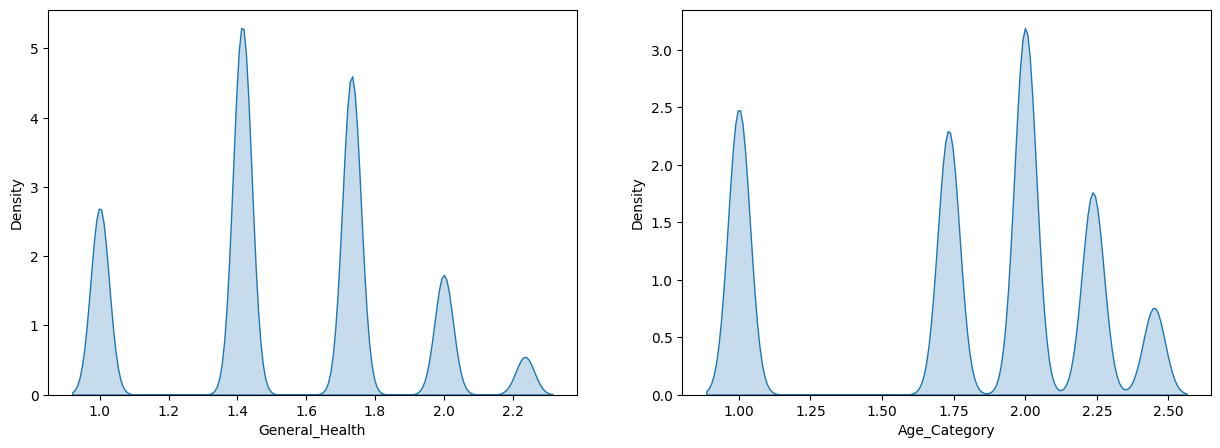

In [42]:
plt.figure(figsize = (15,5), dpi = 100)
plt.subplot(1,2,1)
sns.kdeplot(x=inputs_onehot_1['General_Health'], fill=True)
plt.subplot(1,2,2)
sns.kdeplot(x=inputs_onehot_1['Age_Category'], fill=True)

In [43]:
# 1,2 are sparse classes in Age_Category. We can hence group them together.

In [44]:
data_balanced['Heart_Disease'] = data_balanced['Heart_Disease'].map({'Yes':1,'No':0})
data_not_balanced['Heart_Disease'] = data_not_balanced['Heart_Disease'].map({'Yes':1,'No':0})

In [45]:
targets1 = data_balanced['Heart_Disease']
targets2 = data_not_balanced['Heart_Disease']

In [46]:
inputs_targets_final_1 = pd.concat([inputs_onehot_1,targets1],axis=1)
inputs_targets_final_2 = pd.concat([inputs_onehot_2,targets2],axis=1)

In [47]:
inputs_targets_final_1
# First dataset with proper feature engineering (label encoding and sqrt of numerical columns)

,General_Health,Age_Category,Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Checkup_Never,Checkup_Within the past 2 years,...,Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Height_(cm)_short,Height_(cm)_tall,Height_(cm)_very_tall,BMI_25+_Yes,Smoking_History_Yes,Heart_Disease
0,2.236068,2.236068,5.714893,3.813135,0.000000,5.477226,4.000000,3.464102,0,1,...,0,0,1,0,1,0,0,0,1,0
1,1.414214,2.236068,8.781230,5.318834,0.000000,5.477226,0.000000,2.000000,0,0,...,1,0,0,0,0,0,0,1,0,1
2,1.414214,2.000000,9.404786,5.785326,2.000000,3.464102,1.732051,4.000000,0,0,...,1,0,0,0,1,0,0,1,0,0
3,2.236068,2.236068,9.666437,5.360037,0.000000,5.477226,5.477226,2.828427,0,0,...,1,0,0,1,0,1,0,1,0,1
4,1.732051,2.449490,9.404786,4.936598,0.000000,2.828427,2.000000,0.000000,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1.414214,1.000000,9.036039,5.389805,2.000000,5.477226,2.828427,0.000000,0,0,...,0,0,0,1,0,0,0,1,0,0
308850,2.000000,2.000000,8.357631,4.634652,2.828427,3.872983,7.745967,2.000000,0,0,...,1,0,0,1,0,1,0,0,0,0
308851,1.414214,1.000000,7.824960,4.968903,2.000000,6.324555,2.828427,2.000000,0,0,...,0,1,0,0,1,0,0,0,1,0
308852,1.414214,2.000000,8.909545,4.871345,1.732051,5.477226,3.464102,0.000000,0,0,...,0,0,0,1,0,1,0,0,0,0


In [48]:
# Let's add more features in the first dataset by using feature generation.

In [49]:
inputs_targets_final_1['Alcohol-Fruit ratio'] = inputs_targets_final_1['Alcohol_Consumption']/inputs_targets_final_1['Fruit_Consumption']
inputs_targets_final_1['Fruit-Green ratio'] = inputs_targets_final_1['Fruit_Consumption']/inputs_targets_final_1['Green_Vegetables_Consumption']
inputs_targets_final_1['Alcohol-Potato product'] = inputs_targets_final_1['Alcohol_Consumption']*inputs_targets_final_1['FriedPotato_Consumption']
inputs_targets_final_1

,General_Health,Age_Category,Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Checkup_Never,Checkup_Within the past 2 years,...,Sex_Male,Height_(cm)_short,Height_(cm)_tall,Height_(cm)_very_tall,BMI_25+_Yes,Smoking_History_Yes,Heart_Disease,Alcohol-Fruit ratio,Fruit-Green ratio,Alcohol-Potato product
0,2.236068,2.236068,5.714893,3.813135,0.000000,5.477226,4.000000,3.464102,0,1,...,0,1,0,0,0,1,0,0.000000,1.369306,0.000000
1,1.414214,2.236068,8.781230,5.318834,0.000000,5.477226,0.000000,2.000000,0,0,...,0,0,0,0,1,0,1,0.000000,inf,0.000000
2,1.414214,2.000000,9.404786,5.785326,2.000000,3.464102,1.732051,4.000000,0,0,...,0,1,0,0,1,0,0,0.577350,2.000000,8.000000
3,2.236068,2.236068,9.666437,5.360037,0.000000,5.477226,5.477226,2.828427,0,0,...,1,0,1,0,1,0,1,0.000000,1.000000,0.000000
4,1.732051,2.449490,9.404786,4.936598,0.000000,2.828427,2.000000,0.000000,0,0,...,1,0,0,1,0,1,0,0.000000,1.414214,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1.414214,1.000000,9.036039,5.389805,2.000000,5.477226,2.828427,0.000000,0,0,...,1,0,0,0,1,0,0,0.365148,1.936492,0.000000
308850,2.000000,2.000000,8.357631,4.634652,2.828427,3.872983,7.745967,2.000000,0,0,...,1,0,1,0,0,0,0,0.730297,0.500000,5.656854
308851,1.414214,1.000000,7.824960,4.968903,2.000000,6.324555,2.828427,2.000000,0,0,...,0,1,0,0,0,1,0,0.316228,2.236068,4.000000
308852,1.414214,2.000000,8.909545,4.871345,1.732051,5.477226,3.464102,0.000000,0,0,...,1,0,1,0,0,0,0,0.316228,1.581139,0.000000


In [50]:
inputs_targets_final_1['Alcohol-Fruit ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
inputs_targets_final_1['Fruit-Green ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
inputs_targets_final_1['Alcohol-Potato product'].replace([np.inf, -np.inf], np.nan, inplace=True)
inputs_targets_final_1

,General_Health,Age_Category,Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Checkup_Never,Checkup_Within the past 2 years,...,Sex_Male,Height_(cm)_short,Height_(cm)_tall,Height_(cm)_very_tall,BMI_25+_Yes,Smoking_History_Yes,Heart_Disease,Alcohol-Fruit ratio,Fruit-Green ratio,Alcohol-Potato product
0,2.236068,2.236068,5.714893,3.813135,0.000000,5.477226,4.000000,3.464102,0,1,...,0,1,0,0,0,1,0,0.000000,1.369306,0.000000
1,1.414214,2.236068,8.781230,5.318834,0.000000,5.477226,0.000000,2.000000,0,0,...,0,0,0,0,1,0,1,0.000000,NaN,0.000000
2,1.414214,2.000000,9.404786,5.785326,2.000000,3.464102,1.732051,4.000000,0,0,...,0,1,0,0,1,0,0,0.577350,2.000000,8.000000
3,2.236068,2.236068,9.666437,5.360037,0.000000,5.477226,5.477226,2.828427,0,0,...,1,0,1,0,1,0,1,0.000000,1.000000,0.000000
4,1.732051,2.449490,9.404786,4.936598,0.000000,2.828427,2.000000,0.000000,0,0,...,1,0,0,1,0,1,0,0.000000,1.414214,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1.414214,1.000000,9.036039,5.389805,2.000000,5.477226,2.828427,0.000000,0,0,...,1,0,0,0,1,0,0,0.365148,1.936492,0.000000
308850,2.000000,2.000000,8.357631,4.634652,2.828427,3.872983,7.745967,2.000000,0,0,...,1,0,1,0,0,0,0,0.730297,0.500000,5.656854
308851,1.414214,1.000000,7.824960,4.968903,2.000000,6.324555,2.828427,2.000000,0,0,...,0,1,0,0,0,1,0,0.316228,2.236068,4.000000
308852,1.414214,2.000000,8.909545,4.871345,1.732051,5.477226,3.464102,0.000000,0,0,...,1,0,1,0,0,0,0,0.316228,1.581139,0.000000


In [51]:
(x,y,z)=inputs_targets_final_1['Alcohol-Fruit ratio'].max(),inputs_targets_final_1['Fruit-Green ratio'].max(), inputs_targets_final_1['Alcohol-Potato product'].max()
x,y,z

(5.477225575051661, 10.954451150103322, 60.0)

In [52]:
# Let's impute these values in the place of NANs.

In [53]:
inputs_targets_final_1['Alcohol-Fruit ratio'].replace(np.nan,x,inplace=True)
inputs_targets_final_1['Fruit-Green ratio'].replace(np.nan,y,inplace=True)
inputs_targets_final_1['Alcohol-Potato product'].replace(np.nan,z,inplace=True)
inputs_targets_final_1

,General_Health,Age_Category,Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Checkup_Never,Checkup_Within the past 2 years,...,Sex_Male,Height_(cm)_short,Height_(cm)_tall,Height_(cm)_very_tall,BMI_25+_Yes,Smoking_History_Yes,Heart_Disease,Alcohol-Fruit ratio,Fruit-Green ratio,Alcohol-Potato product
0,2.236068,2.236068,5.714893,3.813135,0.000000,5.477226,4.000000,3.464102,0,1,...,0,1,0,0,0,1,0,0.000000,1.369306,0.000000
1,1.414214,2.236068,8.781230,5.318834,0.000000,5.477226,0.000000,2.000000,0,0,...,0,0,0,0,1,0,1,0.000000,10.954451,0.000000
2,1.414214,2.000000,9.404786,5.785326,2.000000,3.464102,1.732051,4.000000,0,0,...,0,1,0,0,1,0,0,0.577350,2.000000,8.000000
3,2.236068,2.236068,9.666437,5.360037,0.000000,5.477226,5.477226,2.828427,0,0,...,1,0,1,0,1,0,1,0.000000,1.000000,0.000000
4,1.732051,2.449490,9.404786,4.936598,0.000000,2.828427,2.000000,0.000000,0,0,...,1,0,0,1,0,1,0,0.000000,1.414214,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1.414214,1.000000,9.036039,5.389805,2.000000,5.477226,2.828427,0.000000,0,0,...,1,0,0,0,1,0,0,0.365148,1.936492,0.000000
308850,2.000000,2.000000,8.357631,4.634652,2.828427,3.872983,7.745967,2.000000,0,0,...,1,0,1,0,0,0,0,0.730297,0.500000,5.656854
308851,1.414214,1.000000,7.824960,4.968903,2.000000,6.324555,2.828427,2.000000,0,0,...,0,1,0,0,0,1,0,0.316228,2.236068,4.000000
308852,1.414214,2.000000,8.909545,4.871345,1.732051,5.477226,3.464102,0.000000,0,0,...,1,0,1,0,0,0,0,0.316228,1.581139,0.000000


In [54]:
# Let's remove the base cols.
inputs_targets_final_1.drop(['BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption'],axis=1,inplace=True)
inputs_targets_final_1

,General_Health,Age_Category,Weight_(kg),Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,...,Sex_Male,Height_(cm)_short,Height_(cm)_tall,Height_(cm)_very_tall,BMI_25+_Yes,Smoking_History_Yes,Heart_Disease,Alcohol-Fruit ratio,Fruit-Green ratio,Alcohol-Potato product
0,2.236068,2.236068,5.714893,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0.000000,1.369306,0.000000
1,1.414214,2.236068,8.781230,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0.000000,10.954451,0.000000
2,1.414214,2.000000,9.404786,0,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0.577350,2.000000,8.000000
3,2.236068,2.236068,9.666437,0,0,0,1,1,0,0,...,1,0,1,0,1,0,1,0.000000,1.000000,0.000000
4,1.732051,2.449490,9.404786,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0.000000,1.414214,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1.414214,1.000000,9.036039,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0.365148,1.936492,0.000000
308850,2.000000,2.000000,8.357631,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0.730297,0.500000,5.656854
308851,1.414214,1.000000,7.824960,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0.316228,2.236068,4.000000
308852,1.414214,2.000000,8.909545,0,0,0,1,1,0,0,...,1,0,1,0,0,0,0,0.316228,1.581139,0.000000


In [55]:
# New features have been added by using feature generation.

In [56]:
inputs_targets_final_2
#Second dataset without proper feature engineering (no removal of weight column, no label encoding, no sqrt of numerical columns)

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_B,General_Health_C,General_Health_D,...,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_B,Age_Category_C,Age_Category_D,Age_Category_E,Age_Category_F,Smoking_History_Yes,Heart_Disease
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,168.0,81.65,29.05,4.0,30.0,8.0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
308850,180.0,69.85,21.48,8.0,15.0,60.0,4.0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
308851,157.0,61.23,24.69,4.0,40.0,8.0,4.0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
308852,183.0,79.38,23.73,3.0,30.0,12.0,0.0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [57]:
inputs_targets_final_2.isna().sum()

Height_(cm)                                            0
Weight_(kg)                                            0
BMI                                                    0
Alcohol_Consumption                                    0
Fruit_Consumption                                      0
Green_Vegetables_Consumption                           0
FriedPotato_Consumption                                0
General_Health_B                                       0
General_Health_C                                       0
General_Health_D                                       0
General_Health_E                                       0
Checkup_Never                                          0
Checkup_Within the past 2 years                        0
Checkup_Within the past 5 years                        0
Checkup_Within the past year                           0
Exercise_Yes                                           0
Skin_Cancer_Yes                                        0
Other_Cancer_Yes               

In [58]:
inputs_targets_final_1.to_csv('Modified_inputs_targets_1.csv', index=False)
inputs_targets_final_2.to_csv('Modified_inputs_targets_2.csv', index=False)

In [59]:
# Generating two csv files for separate analysis